In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
X_train[0].shape

(28, 28)

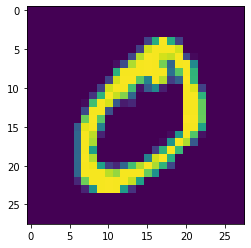

In [8]:
plt.imshow(X_train[1])

In [10]:
(y_train[:5])

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_flatten = X_train.reshape(len(X_train),28*28)
X_flatten.shape

(60000, 784)

In [11]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test_flatten = X_test.reshape(len(X_test),28*28)
X_test_flatten.shape

(10000, 784)

In [20]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid' )
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] 
)
model.fit(X_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 9.5078 - accuracy: 0.8420
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1614 - accuracy: 0.8802
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.8454 - accuracy: 0.8815
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5718 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4291 - accuracy: 0.8877


## scaling might improve accuracy

In [21]:
X_train_flatten_sc = X_flatten/255
X_test_flatten_sc = X_test_flatten/255

In [23]:
X_train_flatten_sc[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
model_sc=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid' )
])

model_sc.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] 
)
model_sc.fit(X_train_flatten_sc,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4719 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9261


In [24]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 8.1449 - accuracy: 0.8521


[8.144879341125488, 0.8521000146865845]

In [25]:
model_sc.evaluate(X_test_flatten_sc,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2704 - accuracy: 0.9256


[0.2703516483306885, 0.925599992275238]

In [27]:
prd = model_sc.predict(X_test_flatten_sc)

313/313 [==============================] - 0s 1ms/step


In [31]:
# plt.imshow(prd[0])
prd[0]

array([2.1543106e-02, 3.1106015e-07, 7.2216079e-02, 9.4848949e-01,
       1.9404801e-03, 1.0564551e-01, 2.3352370e-06, 9.9987203e-01,
       9.9711418e-02, 6.2928402e-01], dtype=float32)

In [35]:
np.argmax(prd[1])

2

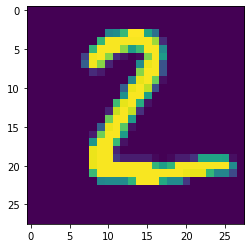

In [34]:
plt.imshow(X_test[1])

In [36]:
prd_labels = [ np.argmax(i) for i in prd]

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=prd_labels)

<AxesSubplot: >

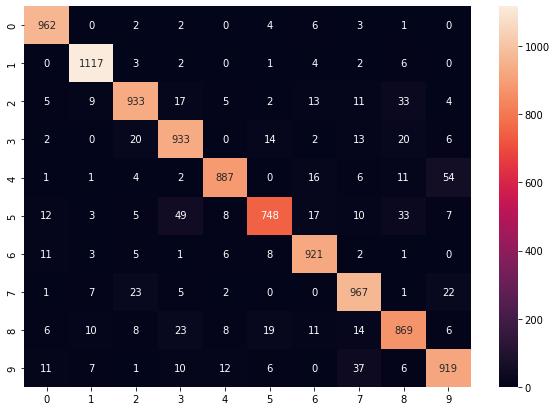

In [39]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')

## adding hidden layer

In [40]:
model_sc=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid' )
])

model_sc.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] 
)
model_sc.fit(X_train_flatten_sc,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2712 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1256 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0679 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0548 - accuracy: 0.9831


In [41]:
model_sc.evaluate(X_test_flatten_sc,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9743


[0.08219560235738754, 0.9743000268936157]

313/313 [==============================] - 1s 3ms/step


<AxesSubplot: >

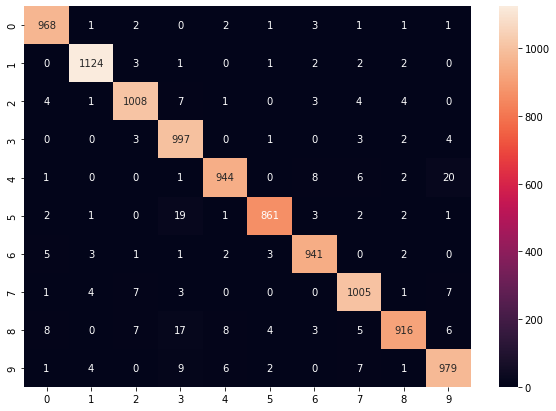

In [43]:
prd = model_sc.predict(X_test_flatten_sc)
prd_labels = [ np.argmax(i) for i in prd ]
cm = tf.math.confusion_matrix(labels=y_test,predictions=prd_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')

In [46]:
X_train = X_train/255
X_test = X_test/255

In [47]:
model_sc=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)) ,
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid' )
])

model_sc.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] 
)
model_sc.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1301 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0672 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9840


313/313 [==============================] - 1s 2ms/step


<AxesSubplot: >

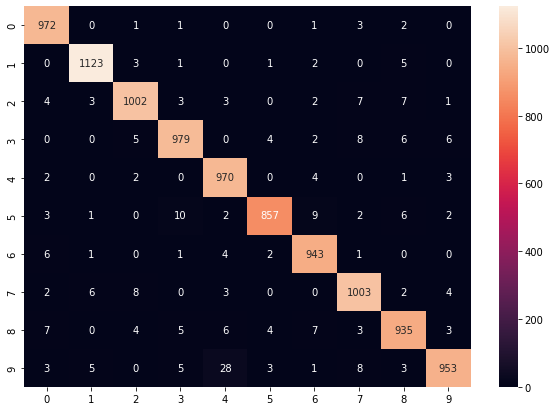

In [48]:
prd = model_sc.predict(X_test)
prd_labels = [ np.argmax(i) for i in prd ]
cm = tf.math.confusion_matrix(labels=y_test,predictions=prd_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')